# Import modules

In [1]:
from arcgis.geometry import filters
import arcpy
from arcpy import env
import json
import numpy as np

In [2]:
import pandas as pd

In [3]:
from arcgis.features import SpatialDataFrame

In [4]:
import matplotlib.pyplot as plt

In [5]:
from arcgis.features import summarize_data

In [6]:
from arcgis.gis import GIS

gis = GIS("http://slustl.maps.arcgis.com/home", "lbernett_SLUSTL")


Enter password: ········


In [7]:
from arcgis.geoenrichment import *

# Import feature layer from ArcGIS Online

In [8]:
from arcgis.features import FeatureLayer

fl = FeatureLayer(url='https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/Tapestry_Households/FeatureServer/1', gis=gis)

In [9]:
from arcgis.features import FeatureLayerCollection

In [10]:
map1 = gis.map('Missouri')

In [11]:
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

# Analyze data on map

In [12]:
map1.add_layer(fl)

In [26]:
usa  =  Country.get('US')
type(usa)

arcgis.geoenrichment.enrichment.Country

In [27]:
geom = usa.subgeographies.states['Missouri'].geometry

# Visualize data for Missouri

In [28]:
map1.draw(geom)

In [32]:
mo_df = enrich(study_areas = [usa.subgeographies.states['Missouri']])

In [33]:
#create an anonymous connection to ArcGIS Online and get a public item
item = GIS (verify_cert=False).content.get ("9a57846e763c4bec87f96463e36f964c")

In [34]:
item

<Item title:"Tapestry_Households" type:Feature Layer Collection owner:esri_demographics>

# Analyze data within feature layer

In [35]:
flayer = item.layers [0]
flayer

<FeatureLayer url:"http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/0">

In [62]:
for f in flayer.properties.fields:
    print (f["name"])

OBJECTID
ID
NAME
STATE_NAME
ST_ABBREV
State_Tapestry_AREA
TSEGNUM
TSEGCODE
TSEGNAME
THHBASE
THH01
THH02
THH03
THH04
THH05
THH06
THH07
THH08
THH09
THH10
THH11
THH12
THH13
THH14
THH15
THH16
THH17
THH18
THH19
THH20
THH21
THH22
THH23
THH24
THH25
THH26
THH27
THH28
THH29
THH30
THH31
THH32
THH33
THH34
THH35
THH36
THH37
THH38
THH39
THH40
THH41
THH42
THH43
THH44
THH45
THH46
THH47
THH48
THH49
THH50
THH51
THH52
THH53
THH54
THH55
THH56
THH57
THH58
THH59
THH60
THH61
THH62
THH63
THH64
THH65
THH66
THH67
THH68
TLIFECODE
TLIFENAME
Flier_URL
THHGRPL1
THHGRPL2
THHGRPL3
THHGRPL4
THHGRPL5
THHGRPL6
THHGRPL7
THHGRPL8
THHGRPL9
THHGRPL10
THHGRPL11
THHGRPL12
THHGRPL13
THHGRPL14


In [36]:
type (flayer)

arcgis.features.layer.FeatureLayer

In [37]:
flayer.properties.extent

{
  "xmin": -19942589.552574527,
  "ymin": 2144547.481119044,
  "xmax": -7452854.379920813,
  "ymax": 11536823.133090973,
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  }
}

In [38]:
flayer.properties.capabilities

'Query'

In [39]:
flayer.properties.drawingInfo.renderer.type

'uniqueValue'

In [40]:
flayer_fset = flayer.query (where= "STATE_NAME= 'Missouri'")
flayer_fset

<FeatureSet> 1 features

In [41]:
flayer_fset.fields

[{'name': 'OBJECTID',
  'type': 'esriFieldTypeOID',
  'alias': 'OBJECTID',
  'sqlType': 'sqlTypeOther',
  'domain': None,
  'defaultValue': None},
 {'name': 'ID',
  'type': 'esriFieldTypeString',
  'alias': 'ID',
  'sqlType': 'sqlTypeOther',
  'length': 2,
  'domain': None,
  'defaultValue': None},
 {'name': 'NAME',
  'type': 'esriFieldTypeString',
  'alias': 'NAME',
  'sqlType': 'sqlTypeOther',
  'length': 20,
  'domain': None,
  'defaultValue': None},
 {'name': 'STATE_NAME',
  'type': 'esriFieldTypeString',
  'alias': 'STATE_NAME',
  'sqlType': 'sqlTypeOther',
  'length': 20,
  'domain': None,
  'defaultValue': None},
 {'name': 'ST_ABBREV',
  'type': 'esriFieldTypeString',
  'alias': 'ST_ABBREV',
  'sqlType': 'sqlTypeOther',
  'length': 2,
  'domain': None,
  'defaultValue': None},
 {'name': 'State_Tapestry_AREA',
  'type': 'esriFieldTypeDouble',
  'alias': 'AREA',
  'sqlType': 'sqlTypeOther',
  'domain': None,
  'defaultValue': None},
 {'name': 'TSEGNUM',
  'type': 'esriFieldTypeInt

In [42]:
flayer_fset2= flayer.query (where= "TLIFENAME= 'Senior Styles'")
flayer_fset2

<FeatureSet> 1 features

In [43]:
flayer_fset2.fields

[{'name': 'OBJECTID',
  'type': 'esriFieldTypeOID',
  'alias': 'OBJECTID',
  'sqlType': 'sqlTypeOther',
  'domain': None,
  'defaultValue': None},
 {'name': 'ID',
  'type': 'esriFieldTypeString',
  'alias': 'ID',
  'sqlType': 'sqlTypeOther',
  'length': 2,
  'domain': None,
  'defaultValue': None},
 {'name': 'NAME',
  'type': 'esriFieldTypeString',
  'alias': 'NAME',
  'sqlType': 'sqlTypeOther',
  'length': 20,
  'domain': None,
  'defaultValue': None},
 {'name': 'STATE_NAME',
  'type': 'esriFieldTypeString',
  'alias': 'STATE_NAME',
  'sqlType': 'sqlTypeOther',
  'length': 20,
  'domain': None,
  'defaultValue': None},
 {'name': 'ST_ABBREV',
  'type': 'esriFieldTypeString',
  'alias': 'ST_ABBREV',
  'sqlType': 'sqlTypeOther',
  'length': 2,
  'domain': None,
  'defaultValue': None},
 {'name': 'State_Tapestry_AREA',
  'type': 'esriFieldTypeDouble',
  'alias': 'AREA',
  'sqlType': 'sqlTypeOther',
  'domain': None,
  'defaultValue': None},
 {'name': 'TSEGNUM',
  'type': 'esriFieldTypeInt

# View data table to answer questions

In [44]:
fl_query_layer = flayer.query()

In [45]:
sdf = fl_query_layer.df
sdf

,Flier_URL,ID,NAME,OBJECTID,STATE_NAME,ST_ABBREV,State_Tapestry_AREA,THH01,THH02,THH03,...,THHGRPL6,THHGRPL7,THHGRPL8,THHGRPL9,TLIFECODE,TLIFENAME,TSEGCODE,TSEGNAME,TSEGNUM,SHAPE
0,http://downloads.esri.com/esri_content_doc/dbl...,01,Alabama,1,Alabama,AL,51643.786616,16687,23670,9679,...,191970,20214,115482,38914,10,Rustic Outposts,10A,Southern Satellites,46,"{'rings': [[[-9802035.16021713, 3528717.259343..."
1,http://downloads.esri.com/esri_content_doc/dbl...,02,Alaska,2,Alaska,AK,582164.003390,872,5692,1407,...,47171,9416,56308,3830,8,Middle Ground,8C,Bright Young Professionals,35,"{'rings': [[[-19938160.1499245, 6674744.671627..."
2,http://downloads.esri.com/esri_content_doc/dbl...,04,Arizona,3,Arizona,AZ,114003.778694,28772,29804,71234,...,106642,476374,232427,428146,7,Ethnic Enclaves,7A,Up and Coming Families,27,"{'rings': [[[-12695993.4908361, 4439106.787529..."
3,http://downloads.esri.com/esri_content_doc/dbl...,05,Arkansas,4,Arkansas,AR,53184.412122,4881,4502,6639,...,148323,43375,99589,56714,10,Rustic Outposts,10B,Rooted Rural,47,"{'rings': [[[-10532797.5235041, 4369536.649991..."
4,http://downloads.esri.com/esri_content_doc/dbl...,06,California,5,California,CA,158106.792909,427632,179922,322306,...,401643,1999773,1358398,698764,7,Ethnic Enclaves,7B,Urban Villages,28,"{'rings': [[[-13038705.0148883, 3845246.849973..."
5,http://downloads.esri.com/esri_content_doc/dbl...,08,Colorado,6,Colorado,CO,104093.902737,26622,70479,90669,...,169989,156251,311084,85494,1,Affluent Estates,1D,Savvy Suburbanites,4,"{'rings': [[[-12139388.2446167, 5012439.014331..."
6,http://downloads.esri.com/esri_content_doc/dbl...,09,Connecticut,7,Connecticut,CT,4979.818063,83830,22856,0,...,68694,6136,192683,100752,5,GenXurban,5C,Parks and Rec,18,"{'rings': [[[-8195678.21036921, 5009974.580819..."
7,http://downloads.esri.com/esri_content_doc/dbl...,10,Delaware,8,Delaware,DE,1996.747022,5741,5388,6347,...,41198,4654,45750,36779,5,GenXurban,5C,Parks and Rec,18,"{'rings': [[[-8357995.99698342, 4644080.018912..."
8,http://downloads.esri.com/esri_content_doc/dbl...,11,District of Columbia,9,District of Columbia,DC,68.427143,11377,0,0,...,0,0,9725,17011,3,Uptown Individuals,3A,Laptops and Lattes,10,"{'rings': [[[-8571875.65237447, 4716761.942008..."
9,http://downloads.esri.com/esri_content_doc/dbl...,12,Florida,10,Florida,FL,56846.495593,60647,76876,90002,...,418815,909219,755598,1563524,9,Senior Styles,9C,The Elders,42,"{'rings': [[[-9687189, 3580238.5], [-9687414, ..."


In [48]:
sdf.sort_values (by= "STATE_NAME")

,Flier_URL,ID,NAME,OBJECTID,STATE_NAME,ST_ABBREV,State_Tapestry_AREA,THH01,THH02,THH03,...,THHGRPL6,THHGRPL7,THHGRPL8,THHGRPL9,TLIFECODE,TLIFENAME,TSEGCODE,TSEGNAME,TSEGNUM,SHAPE
0,http://downloads.esri.com/esri_content_doc/dbl...,01,Alabama,1,Alabama,AL,51643.786616,16687,23670,9679,...,191970,20214,115482,38914,10,Rustic Outposts,10A,Southern Satellites,46,"{'rings': [[[-9802035.16021713, 3528717.259343..."
1,http://downloads.esri.com/esri_content_doc/dbl...,02,Alaska,2,Alaska,AK,582164.003390,872,5692,1407,...,47171,9416,56308,3830,8,Middle Ground,8C,Bright Young Professionals,35,"{'rings': [[[-19938160.1499245, 6674744.671627..."
2,http://downloads.esri.com/esri_content_doc/dbl...,04,Arizona,3,Arizona,AZ,114003.778694,28772,29804,71234,...,106642,476374,232427,428146,7,Ethnic Enclaves,7A,Up and Coming Families,27,"{'rings': [[[-12695993.4908361, 4439106.787529..."
3,http://downloads.esri.com/esri_content_doc/dbl...,05,Arkansas,4,Arkansas,AR,53184.412122,4881,4502,6639,...,148323,43375,99589,56714,10,Rustic Outposts,10B,Rooted Rural,47,"{'rings': [[[-10532797.5235041, 4369536.649991..."
4,http://downloads.esri.com/esri_content_doc/dbl...,06,California,5,California,CA,158106.792909,427632,179922,322306,...,401643,1999773,1358398,698764,7,Ethnic Enclaves,7B,Urban Villages,28,"{'rings': [[[-13038705.0148883, 3845246.849973..."
5,http://downloads.esri.com/esri_content_doc/dbl...,08,Colorado,6,Colorado,CO,104093.902737,26622,70479,90669,...,169989,156251,311084,85494,1,Affluent Estates,1D,Savvy Suburbanites,4,"{'rings': [[[-12139388.2446167, 5012439.014331..."
6,http://downloads.esri.com/esri_content_doc/dbl...,09,Connecticut,7,Connecticut,CT,4979.818063,83830,22856,0,...,68694,6136,192683,100752,5,GenXurban,5C,Parks and Rec,18,"{'rings': [[[-8195678.21036921, 5009974.580819..."
7,http://downloads.esri.com/esri_content_doc/dbl...,10,Delaware,8,Delaware,DE,1996.747022,5741,5388,6347,...,41198,4654,45750,36779,5,GenXurban,5C,Parks and Rec,18,"{'rings': [[[-8357995.99698342, 4644080.018912..."
8,http://downloads.esri.com/esri_content_doc/dbl...,11,District of Columbia,9,District of Columbia,DC,68.427143,11377,0,0,...,0,0,9725,17011,3,Uptown Individuals,3A,Laptops and Lattes,10,"{'rings': [[[-8571875.65237447, 4716761.942008..."
9,http://downloads.esri.com/esri_content_doc/dbl...,12,Florida,10,Florida,FL,56846.495593,60647,76876,90002,...,418815,909219,755598,1563524,9,Senior Styles,9C,The Elders,42,"{'rings': [[[-9687189, 3580238.5], [-9687414, ..."


In [49]:
MO= (sdf.THHGRPL1 [25], sdf.THHGRPL2 [25], sdf.THHGRPL3 [25], sdf.THHGRPL4 [25], sdf.THHGRPL5 [25],
    sdf.THHGRPL6 [25], sdf.THHGRPL7 [25], sdf.THHGRPL8 [25], sdf.THHGRPL9 [25], sdf.THHGRPL10 [25], sdf.THHGRPL11 [25],
    sdf.THHGRPL12 [25], sdf.THHGRPL13 [25], sdf.THHGRPL14 [25])
MO


(152597,
 14770,
 35620,
 262443,
 363397,
 457871,
 42699,
 276584,
 76777,
 249576,
 133384,
 302666,
 3679,
 47824)

In [51]:
sdf.sort_values (by= "NAME")

,Flier_URL,ID,NAME,OBJECTID,STATE_NAME,ST_ABBREV,State_Tapestry_AREA,THH01,THH02,THH03,...,THHGRPL6,THHGRPL7,THHGRPL8,THHGRPL9,TLIFECODE,TLIFENAME,TSEGCODE,TSEGNAME,TSEGNUM,SHAPE
0,http://downloads.esri.com/esri_content_doc/dbl...,01,Alabama,1,Alabama,AL,51643.786616,16687,23670,9679,...,191970,20214,115482,38914,10,Rustic Outposts,10A,Southern Satellites,46,"{'rings': [[[-9802035.16021713, 3528717.259343..."
1,http://downloads.esri.com/esri_content_doc/dbl...,02,Alaska,2,Alaska,AK,582164.003390,872,5692,1407,...,47171,9416,56308,3830,8,Middle Ground,8C,Bright Young Professionals,35,"{'rings': [[[-19938160.1499245, 6674744.671627..."
2,http://downloads.esri.com/esri_content_doc/dbl...,04,Arizona,3,Arizona,AZ,114003.778694,28772,29804,71234,...,106642,476374,232427,428146,7,Ethnic Enclaves,7A,Up and Coming Families,27,"{'rings': [[[-12695993.4908361, 4439106.787529..."
3,http://downloads.esri.com/esri_content_doc/dbl...,05,Arkansas,4,Arkansas,AR,53184.412122,4881,4502,6639,...,148323,43375,99589,56714,10,Rustic Outposts,10B,Rooted Rural,47,"{'rings': [[[-10532797.5235041, 4369536.649991..."
4,http://downloads.esri.com/esri_content_doc/dbl...,06,California,5,California,CA,158106.792909,427632,179922,322306,...,401643,1999773,1358398,698764,7,Ethnic Enclaves,7B,Urban Villages,28,"{'rings': [[[-13038705.0148883, 3845246.849973..."
5,http://downloads.esri.com/esri_content_doc/dbl...,08,Colorado,6,Colorado,CO,104093.902737,26622,70479,90669,...,169989,156251,311084,85494,1,Affluent Estates,1D,Savvy Suburbanites,4,"{'rings': [[[-12139388.2446167, 5012439.014331..."
6,http://downloads.esri.com/esri_content_doc/dbl...,09,Connecticut,7,Connecticut,CT,4979.818063,83830,22856,0,...,68694,6136,192683,100752,5,GenXurban,5C,Parks and Rec,18,"{'rings': [[[-8195678.21036921, 5009974.580819..."
7,http://downloads.esri.com/esri_content_doc/dbl...,10,Delaware,8,Delaware,DE,1996.747022,5741,5388,6347,...,41198,4654,45750,36779,5,GenXurban,5C,Parks and Rec,18,"{'rings': [[[-8357995.99698342, 4644080.018912..."
8,http://downloads.esri.com/esri_content_doc/dbl...,11,District of Columbia,9,District of Columbia,DC,68.427143,11377,0,0,...,0,0,9725,17011,3,Uptown Individuals,3A,Laptops and Lattes,10,"{'rings': [[[-8571875.65237447, 4716761.942008..."
9,http://downloads.esri.com/esri_content_doc/dbl...,12,Florida,10,Florida,FL,56846.495593,60647,76876,90002,...,418815,909219,755598,1563524,9,Senior Styles,9C,The Elders,42,"{'rings': [[[-9687189, 3580238.5], [-9687414, ..."


Answers:
1.  The dominant Tapestry LifeMode Group Name in Missouri is "Family Landscapes"

Histogram:

Text(0.5,1,'Histogram of Missouri Tapesty LifeMode Groups')

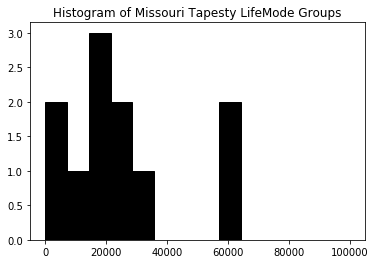

In [127]:
plt.hist(MO, bins=14, range=(1, 100000.0), fc='k', ec='k')
plt.title ("Histogram of Missouri Tapesty LifeMode Groups")

Pie Chart:

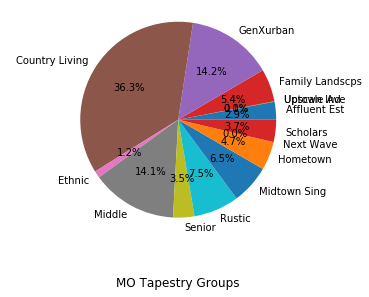

In [134]:
%matplotlib inline
labels= ("Affluent Est", "Upscale Ave", "Uptown Ind", "Family Landscps", "GenXurban", "Country Living",
        "Ethnic", "Middle", "Senior", "Rustic", "Midtown Sing", "Hometown", "Next Wave", "Scholars")
plt.title ("MO Tapestry Groups", y= -0.3)
plt.pie (MO, labels=labels, autopct = "%1.1f%%");
plt.axis ('equal');


Dominant Tapestry Segment Name for MO: Middleburg

In [131]:
MO2= (sdf.THH01 [26], sdf.THH02 [26], sdf.THH04 [26], sdf.THH05 [26], sdf.THH11 [26],
    sdf.THH13 [26], sdf.THH14 [26], sdf.THH15 [26], sdf.THH16 [26], sdf.THH17 [26], sdf.THH18 [26], sdf.THH19 [26], sdf.THH20[26],
    sdf.THH21 [26], sdf.THH22 [26], sdf.THH23 [26], sdf.THH24 [26], sdf.THH25 [26], sdf.THH26 [26], sdf.THH27 [26], sdf.THH29 [26], 
    sdf.THH34 [26], sdf.THH36 [26], sdf.THH37 [26], sdf.THH38 [26], sdf.THH39 [26], sdf.THH41 [26], sdf.THH43 [26], sdf.THH44 [26], 
    sdf.THH45 [26], sdf.THH46 [26], sdf.THH47 [26], sdf.THH48 [26], sdf.THH49 [26], sdf.THH50 [26], 
    sdf.THH51 [26], sdf.THH52 [26], sdf.THH53 [26], sdf.THH54 [26], sdf.THH55 [26], sdf.THH56 [26], sdf.THH57 [26], sdf.THH58 [26], 
    sdf.THH65 [26], sdf.THH66 [26], sdf.THH67 [26], sdf.THH68 [26])
MO2

(1232,
 909,
 0,
 5942,
 4437,
 0,
 0,
 0,
 0,
 0,
 379,
 0,
 2459,
 706,
 19859,
 8224,
 22719,
 1201,
 7725,
 20582,
 26845,
 3262,
 37056,
 42957,
 32026,
 12697,
 3640,
 0,
 1087,
 0,
 0,
 197,
 0,
 13837,
 7107,
 0,
 2780,
 35310,
 1283,
 0,
 1404,
 0,
 3411,
 7690,
 2460,
 13405,
 5261,
 3990,
 8053,
 1244,
 0,
 2607,
 313,
 23965,
 677,
 176,
 3936,
 15953,
 0,
 0,
 0,
 0,
 0,
 0,
 879,
 13844,
 1004,
 17)

Text(0.5,1,'Histogram of Missouri Tapesty Segment Names')

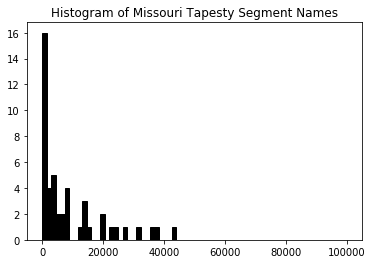

In [132]:
plt.hist(MO2, bins=68, range=(1, 100000.0), fc='k', ec='k')
plt.title ("Histogram of Missouri Tapesty Segment Names")

ValueError: 'label' must be of length 'x'

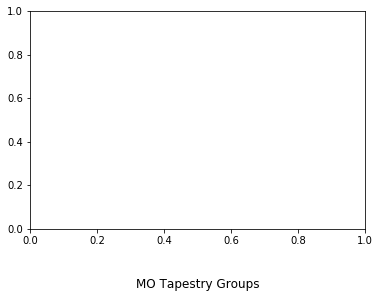

In [137]:
%matplotlib inline
labels2= "Top Tier", "Professional Pride", "Savvy Suburbanites", "Exurbanites", "Metro Renters", 
"Soccer Moms", "Home Improvement", "Middleburg", "Comfortable Empty Nesters", "In Style",
"Parks and Rec","Rustbelt Traditions", "Midlife Constants", "Green Acres", "Salt of the Earth", "The Great Outdoors",
"Prairie Living", "Rural Resort Dwellers","Heartland Communities", "Up and Coming Families","American Dreamers", 
"Southwestern Families", "Emerald City","Bright Young Professionals","Front Porches","Old and Newcomers","Hardscrabble Roade",
"Golden Years","Senior Escapes","Retirement Communities","Social Security Set",
"Southern Satellites","Rooted Rural","Diners & Miners","Down the Road","Rural Bypasses","Young and Restless","Metro Fusion","Set to Impress","City Commons","Family Foundations","Traditional Living",
"Small Town Simplicity","Military Proximity","College Towns","Dorms to Diplomas","Unclassified"

plt.title ("MO Tapestry Groups", y= -0.3)
plt.pie (MO2, labels=labels2, autopct = "%1.0f%%");
plt.axis ('equal');
